## Libraries

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

## Data Understanding

In [40]:
base_path = '/content/drive/MyDrive/Internship/IDX Partners'
data_path = os.path.join(base_path, 'Dataset')

In [41]:
df = pd.read_csv(os.path.join(data_path, 'loan_data_2007_2014.csv'))
df.info()

<ipython-input-41-cdfa5b07dd11>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, 'loan_data_2007_2014.csv'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [42]:
df.iloc[:, :10].describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000


In [43]:
df.iloc[:, 10:40].describe()

,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt
count,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000
mean,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220
std,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112
min,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349
50%,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943
75%,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460
max,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870


In [44]:
df.iloc[:, 40:].describe()

,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [45]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


## Preprocessing

### Drop Duplicates

In [46]:
df.drop_duplicates(inplace=True)

### Drop Null Values

In [47]:
df.dropna(axis=0, how='all' ,inplace=True) # Drop all null rows in dataframe
df.dropna(axis=1, how='all' ,inplace=True) # Drop all null columns in dataframe
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [48]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [49]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### Fill NAs

In [50]:
print(f"total unique employment title: {len(df['emp_title'].unique())}")

total unique employment title: 205476


In [51]:
df['emp_title'].fillna(value='unemployment', inplace=True)

In [52]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [54]:
df['emp_length']

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
466280      4 years
466281    10+ years
466282      7 years
466283      3 years
466284    10+ years
Name: emp_length, Length: 466285, dtype: object

In [56]:
df['emp_length'] = np.where(df['annual_inc'].isna(), '< 1 year', df['emp_length'])
df['emp_length'] = np.where((df['annual_inc'].isna() | df['emp_length'].isna()), '1 year', df['emp_length'])
df['desc'] = np.where(df['desc'].isna(), df['purpose'], df['desc'])

In [58]:
df = df[~df['annual_inc'].isna()]
df = df[~df['earliest_cr_line'].isna()]
df['title'] = np.where(df['title'].isna(), df['purpose'], df['title'])

In [59]:
df['application_type'].value_counts()

# Drop the application type since its only 1 value
df.drop(['application_type'], axis=1, inplace=True)

In [60]:
df[df['next_pymnt_d'].isna()][['loan_status']].value_counts()

loan_status
Fully Paid     184739
Charged Off     42475
dtype: int64

In [61]:
df[df['next_pymnt_d'].notna()][['loan_status']].value_counts()

loan_status                                        
Current                                                224226
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1962
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       758
dtype: int64

In [62]:
df.drop(['mths_since_last_major_derog'], axis=1, inplace=True)

In [63]:
# drop the column of next payment date because all of the loan status where the next payment date is null is already done
df.drop(['next_pymnt_d', 'last_pymnt_d'], axis=1, inplace=True)

In [64]:
# Change datetime data type
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d']

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_d, Length: 466256, dtype: datetime64[ns]

In [65]:
# Fill null of revolving utilization with 0
df['revol_util'].fillna(value=0, inplace=True)

In [66]:
df[df['mths_since_last_delinq'].isna()]['loan_status'].value_counts()

Current                                                115388
Fully Paid                                             104404
Charged Off                                             23655
Late (31-120 days)                                       3308
In Grace Period                                          1435
Does not meet the credit policy. Status:Fully Paid        878
Late (16-30 days)                                         536
Default                                                   426
Does not meet the credit policy. Status:Charged Off       292
Name: loan_status, dtype: int64

In [67]:
# Fill nulls of mths_since_last_delinq with 0 with assumption that the credit member didnt do deliquency
df['mths_since_last_delinq'].fillna(value=0, inplace=True)


# After a serious delinquency, a creditor may take legal action against you,
# which may become a public record and, in some cases, appear on your credit report.

# Fill nulls of mths_since_last_record with 0 with assumption that the creditor may not take legal action against the credit member
df['mths_since_last_record'].fillna(value=0, inplace=True)

In [68]:
df['collections_12_mths_ex_med'].fillna(value=0, inplace=True)

df.drop(['last_credit_pull_d'], axis=1, inplace=True)

In [69]:
df['tot_coll_amt'] = np.where(df['tot_coll_amt'].isna(), 0, df['tot_coll_amt'])

In [70]:
# Fill null values in tot_cur_bal with balance from revolving account in assumption that the borrower only have revolving account
df['tot_cur_bal'] = np.where(df['tot_cur_bal'].isna(), df['revol_bal'], df['tot_cur_bal'])

In [71]:
df[(df['sub_grade'] == 'B2')][['grade', 'sub_grade','annual_inc', 'revol_bal', 'tot_cur_bal', 'revol_util', 'total_rev_hi_lim']]

,grade,sub_grade,annual_inc,revol_bal,tot_cur_bal,revol_util,total_rev_hi_lim
0,B,B2,24000.0,13648,13648.0,83.7,NaN
14,B,B2,100000.0,11997,11997.0,55.5,NaN
35,B,B2,41000.0,11095,11095.0,57.2,NaN
47,B,B2,27000.0,7814,7814.0,52.3,NaN
52,B,B2,40000.0,12168,12168.0,92.9,NaN
...,...,...,...,...,...,...,...
466228,B,B2,120000.0,5702,16401.0,22.9,24900.0
466233,B,B2,47000.0,11000,215836.0,85.3,12900.0
466247,B,B2,150000.0,10513,38802.0,82.8,12700.0
466250,B,B2,150000.0,4311,99144.0,42.3,10200.0


In [72]:
a_mean = df[(df['grade'] == 'A')]['total_rev_hi_lim'].mean()
b_mean = df[(df['grade'] == 'B')]['total_rev_hi_lim'].mean()
c_mean = df[(df['grade'] == 'C')]['total_rev_hi_lim'].mean()
d_mean = df[(df['grade'] == 'D')]['total_rev_hi_lim'].mean()
e_mean = df[(df['grade'] == 'E')]['total_rev_hi_lim'].mean()
f_mean = df[(df['grade'] == 'F')]['total_rev_hi_lim'].mean()
g_mean = df[(df['grade'] == 'G')]['total_rev_hi_lim'].mean()

In [73]:
print(f"a mean: {a_mean}")
print(f"b mean: {b_mean}")
print(f"c mean: {c_mean}")
print(f"d mean: {d_mean}")
print(f"e mean: {e_mean}")
print(f"f mean: {f_mean}")
print(f"g mean: {g_mean}")

a mean: 44975.31775089899
b mean: 30573.093051128617
c mean: 27336.316962834542
d mean: 25566.18284330476
e mean: 25892.479328627654
f mean: 24799.380062029242
g mean: 27053.001878287003


In [74]:
df.loc[(df['grade']=='A') & (df['total_rev_hi_lim'].isna()), 'total_rev_hi_lim'] = a_mean
df.loc[(df['grade']=='B') & (df['total_rev_hi_lim'].isna()), 'total_rev_hi_lim'] = b_mean
df.loc[(df['grade']=='C') & (df['total_rev_hi_lim'].isna()), 'total_rev_hi_lim'] = c_mean
df.loc[(df['grade']=='D') & (df['total_rev_hi_lim'].isna()), 'total_rev_hi_lim'] = d_mean
df.loc[(df['grade']=='E') & (df['total_rev_hi_lim'].isna()), 'total_rev_hi_lim'] = e_mean
df.loc[(df['grade']=='F') & (df['total_rev_hi_lim'].isna()), 'total_rev_hi_lim'] = f_mean
df.loc[(df['grade']=='G') & (df['total_rev_hi_lim'].isna()), 'total_rev_hi_lim'] = g_mean

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466256 entries, 0 to 466284
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          466256 non-null  int64         
 1   member_id                   466256 non-null  int64         
 2   loan_amnt                   466256 non-null  int64         
 3   funded_amnt                 466256 non-null  int64         
 4   funded_amnt_inv             466256 non-null  float64       
 5   term                        466256 non-null  object        
 6   int_rate                    466256 non-null  float64       
 7   installment                 466256 non-null  float64       
 8   grade                       466256 non-null  object        
 9   sub_grade                   466256 non-null  object        
 10  emp_title                   466256 non-null  object        
 11  emp_length                  466256 non-

### Check Outliers

In [76]:
df_copy = df.copy()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


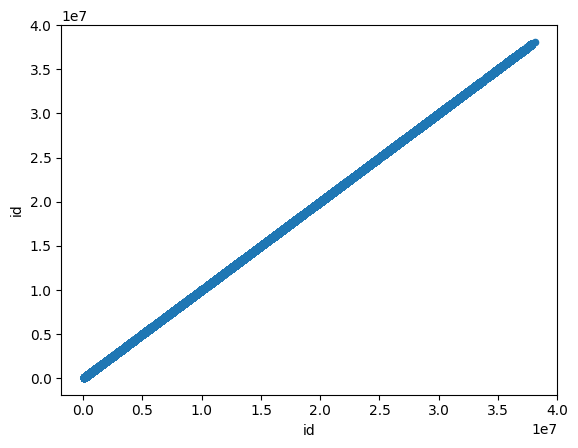

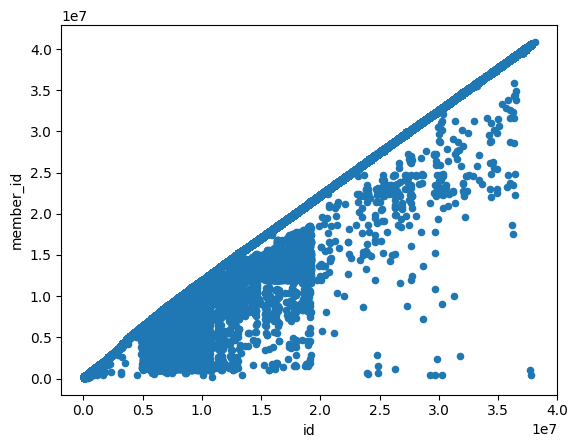

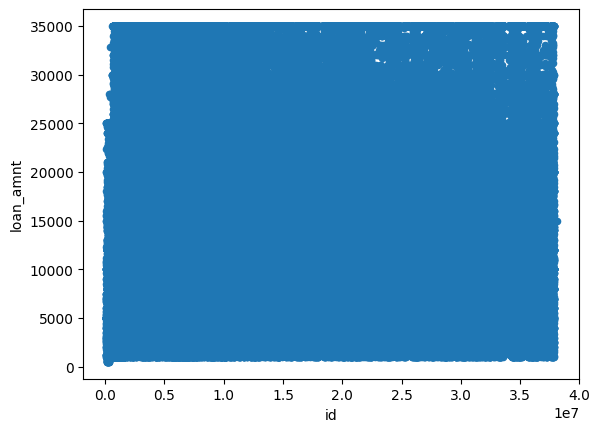

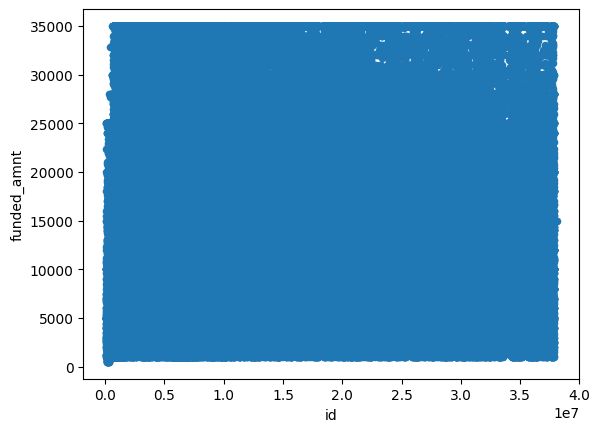

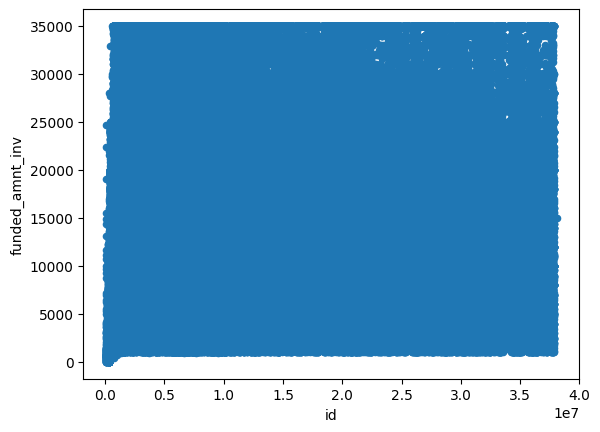

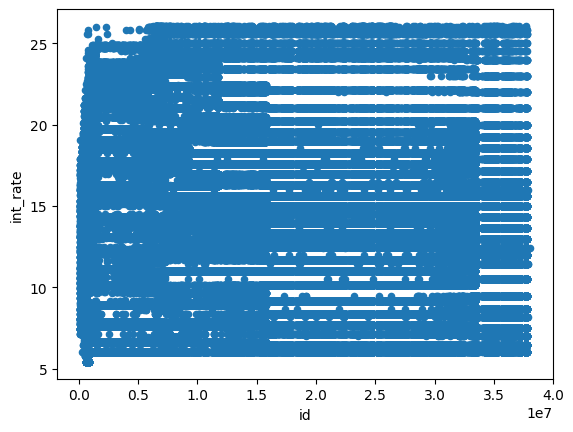

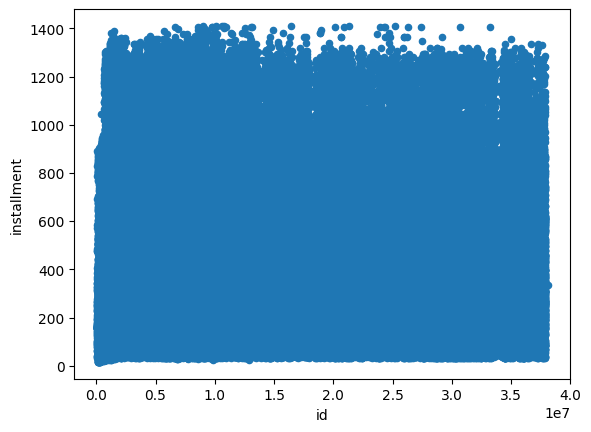

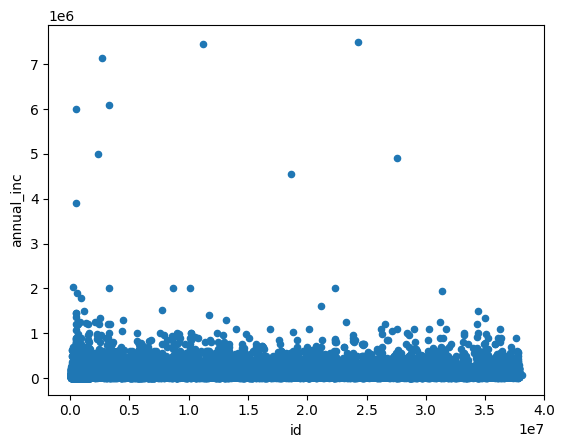

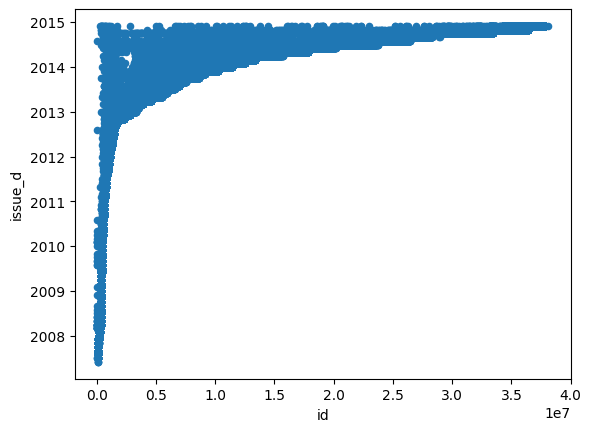

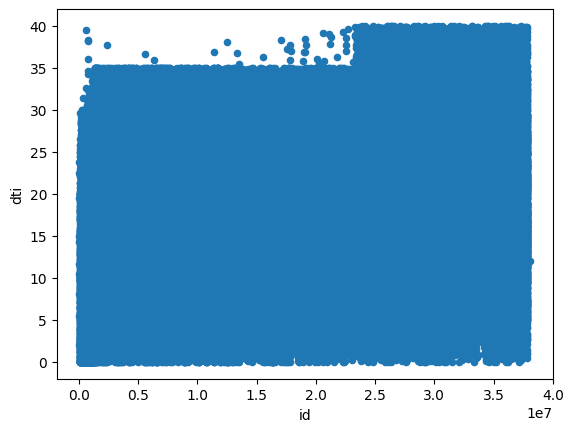

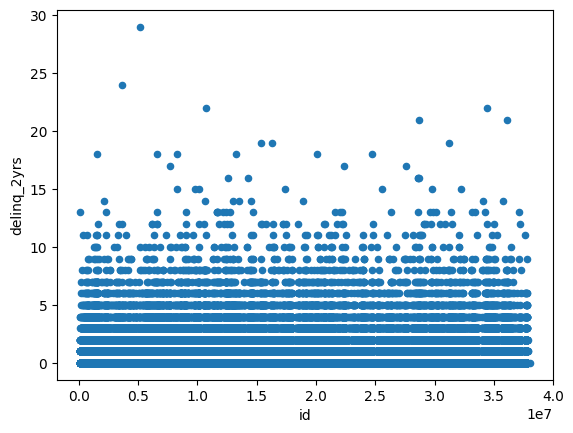

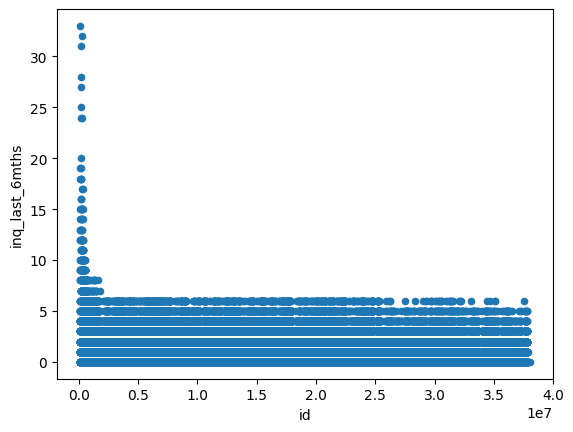

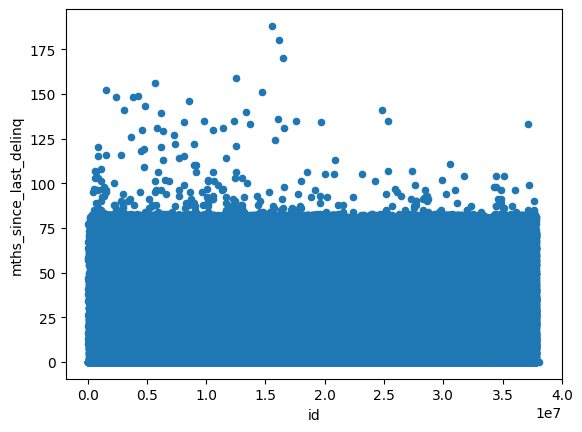

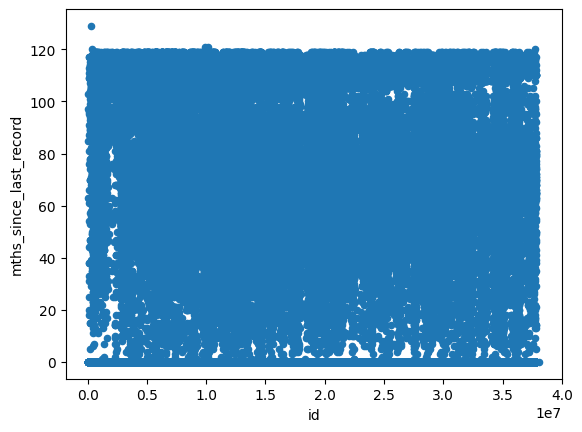

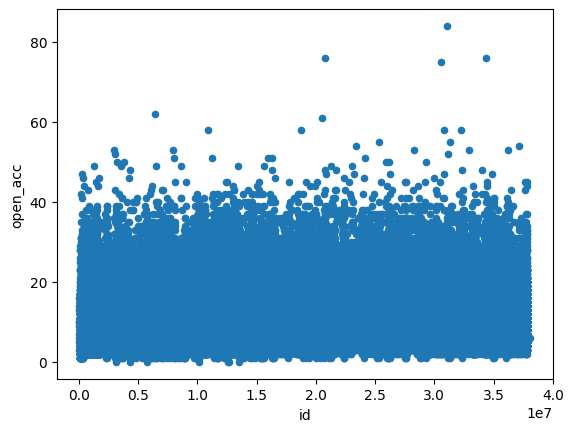

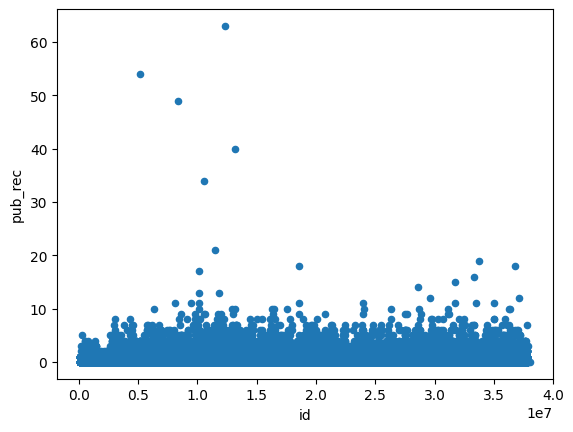

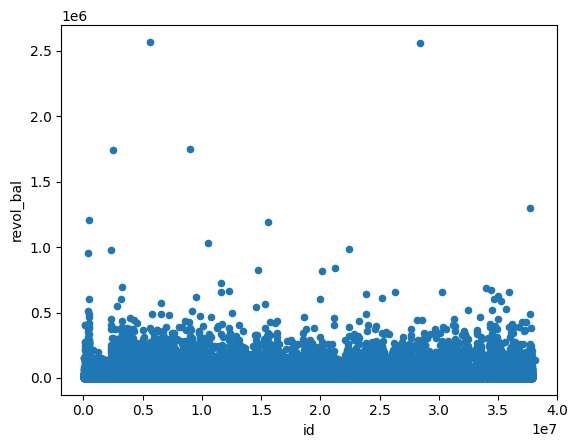

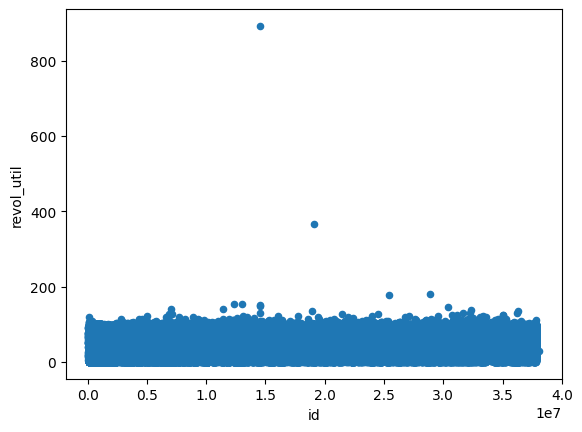

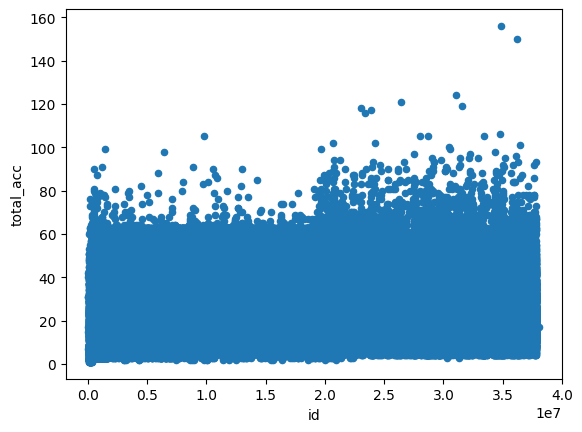

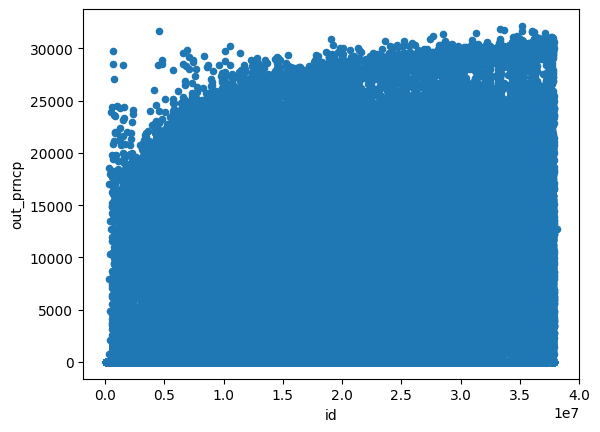

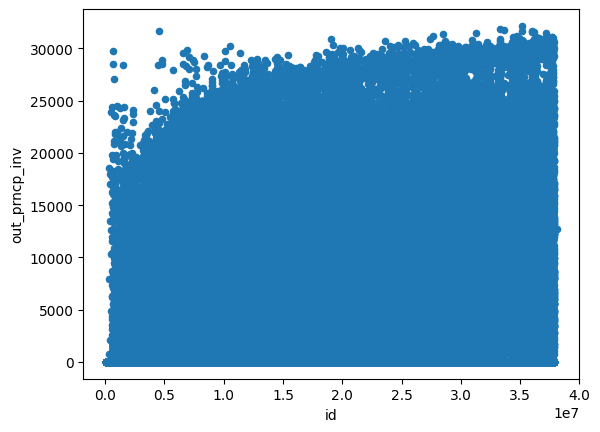

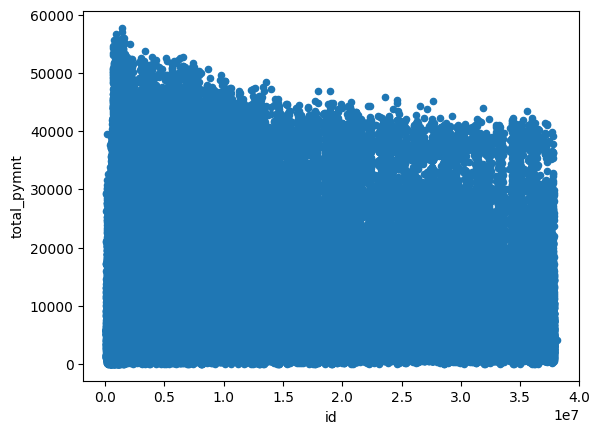

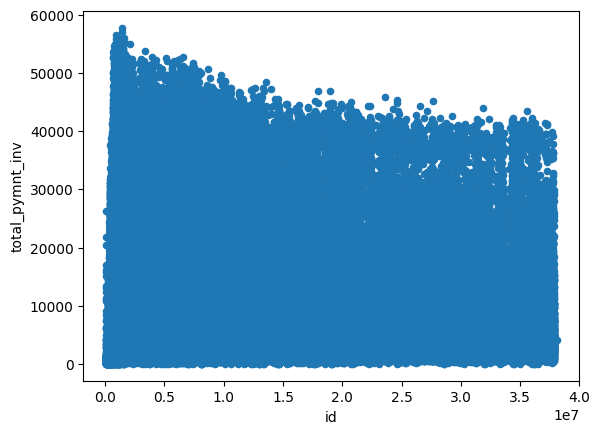

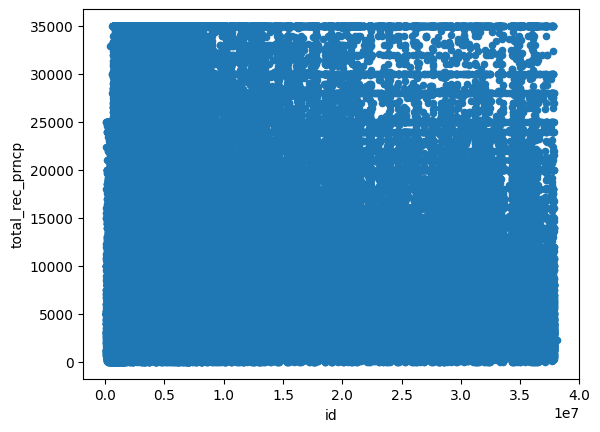

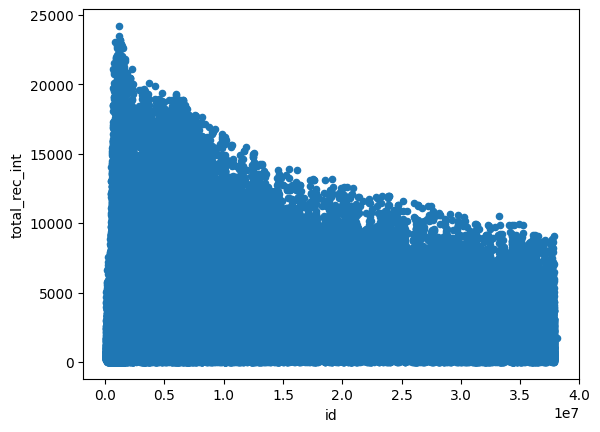

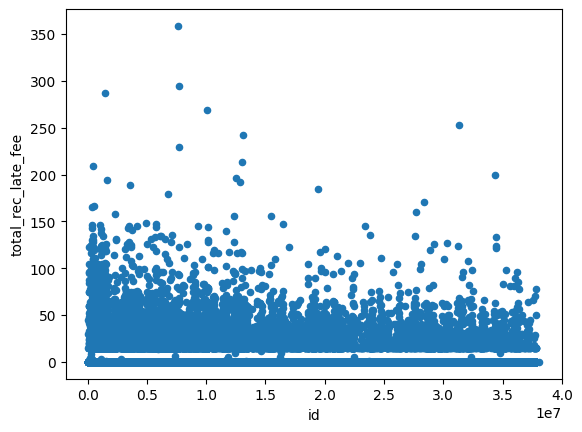

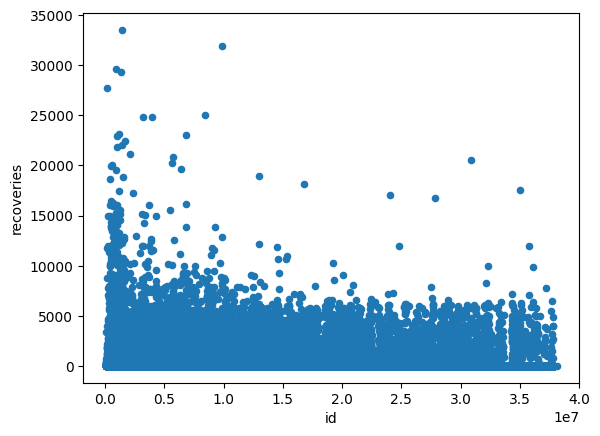

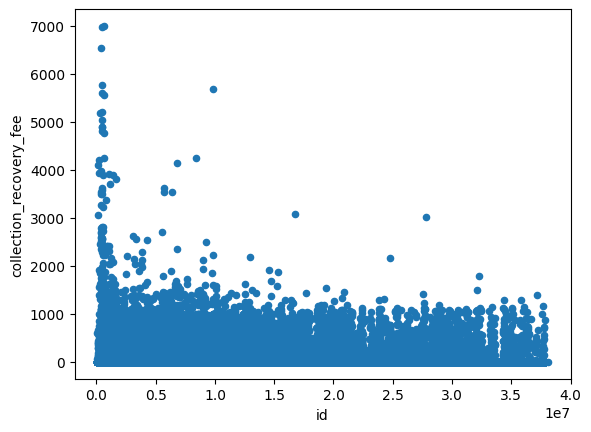

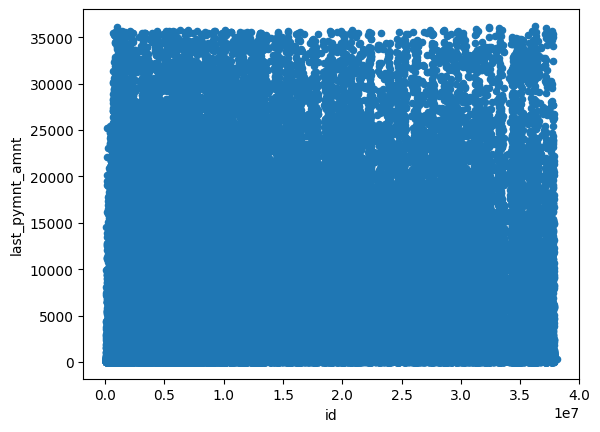

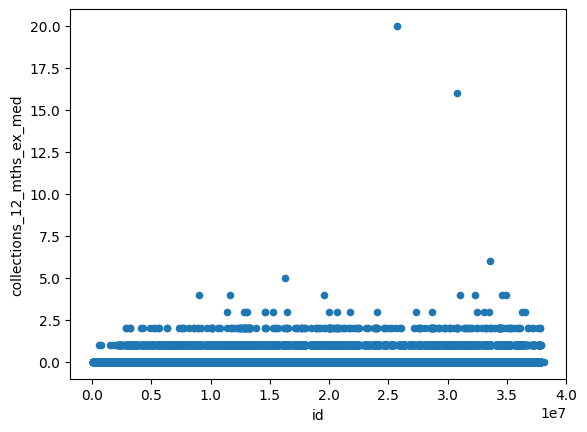

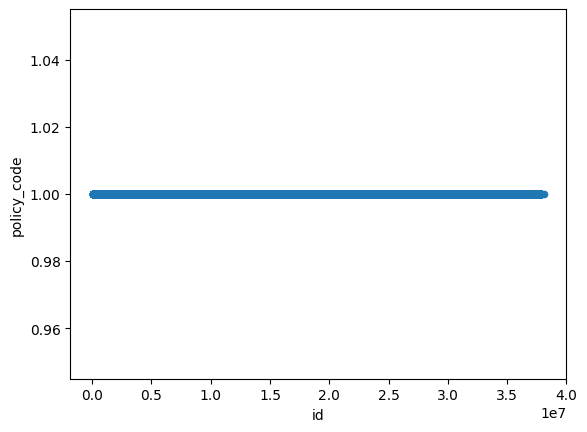

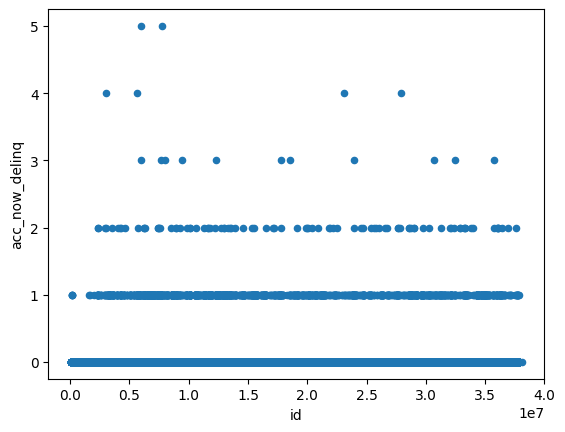

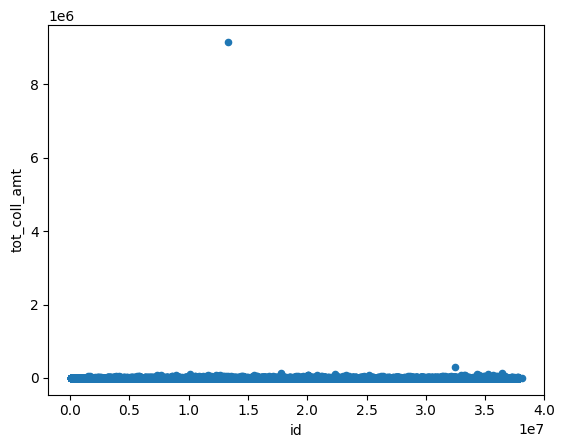

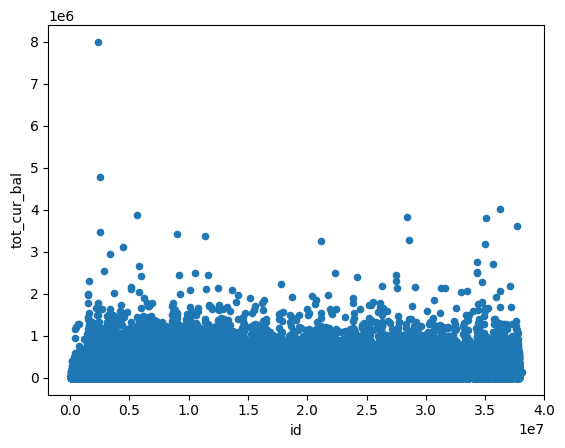

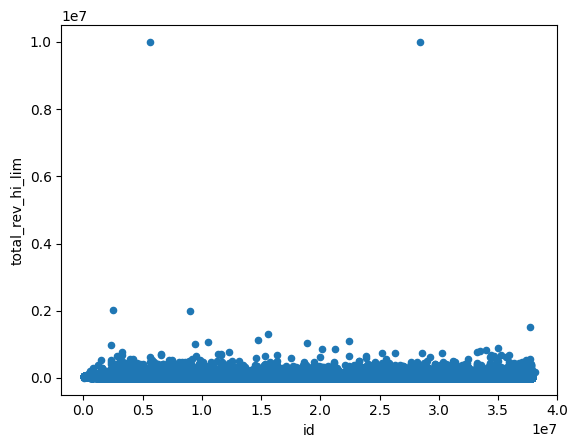

In [77]:
for col in df_copy.columns:
  if df_copy[col].dtypes not in ['object', 'O']:
    try:
      df_copy.plot(kind='scatter', x='id', y=col)
    except:
      print(f'column {col} can\'t be plotted')
  else:
    continue


number of outlier in column revol_util are 19


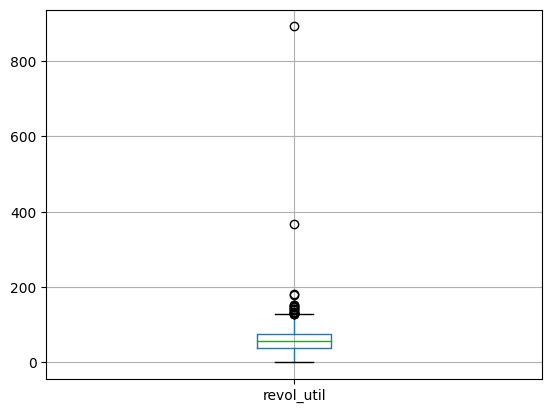

In [78]:
col = 'revol_util'

Q1 = np.percentile(df_copy[col], 25, method='midpoint')
Q3 = np.percentile(df_copy[col], 75, method='midpoint')
IQR = Q3 - Q1
lower = Q1 -1.5*IQR
upper = Q3 +1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_copy[col]>=upper)[0]
lower_array = np.where(df_copy[col]<=lower)[0]
print(f'number of outlier in column {col} are {len(upper_array) + len(lower_array)}')
    # Removing the outliers
try:
  plt.figure()
  # df_copy.drop(index=upper_array, axis=0, inplace=True)
  # df_copy.drop(index=lower_array, axis=0, inplace=True)
  df_copy.boxplot([col])
except Exception as e:
  print(f'column {col} can\'t be plotted')

number of outlier in column id are 0
number of outlier in column member_id are 0
number of outlier in column loan_amnt are 0
number of outlier in column funded_amnt are 0
number of outlier in column funded_amnt_inv are 0
number of outlier in column int_rate are 4904
number of outlier in column installment are 11711
number of outlier in column annual_inc are 19897
number of outlier in column issue_d are 24911
column issue_d can't be plotted
number of outlier in column dti are 43
number of outlier in column delinq_2yrs are 849210
number of outlier in column inq_last_6mths are 36785
number of outlier in column mths_since_last_delinq are 18315
number of outlier in column mths_since_last_record are 871152
number of outlier in column open_acc are 13598
number of outlier in column pub_rec are 871149
number of outlier in column revol_bal are 22881
number of outlier in column revol_util are 19
number of outlier in column total_acc are 8674
number of outlier in column out_prncp are 23331
number 

<ipython-input-79-8727a298574d>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


number of outlier in column total_pymnt are 19037
number of outlier in column total_pymnt_inv are 19048
number of outlier in column total_rec_prncp are 20649
number of outlier in column total_rec_int are 31137
number of outlier in column total_rec_late_fee are 921838
number of outlier in column recoveries are 908144
number of outlier in column collection_recovery_fee are 909309
number of outlier in column last_pymnt_amnt are 70326
number of outlier in column collections_12_mths_ex_med are 928598
number of outlier in column policy_code are 932512
number of outlier in column acc_now_delinq are 930780
number of outlier in column tot_coll_amt are 882762
number of outlier in column tot_cur_bal are 17629
number of outlier in column total_rev_hi_lim are 23794


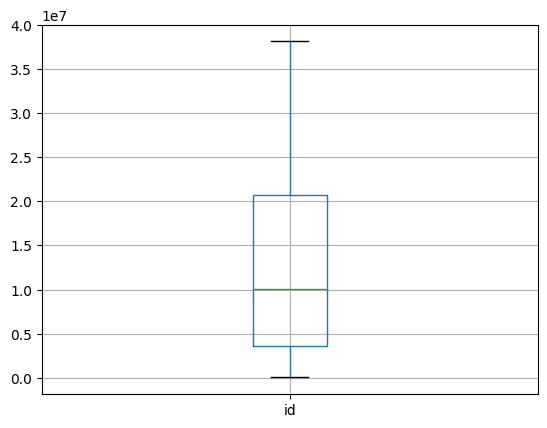

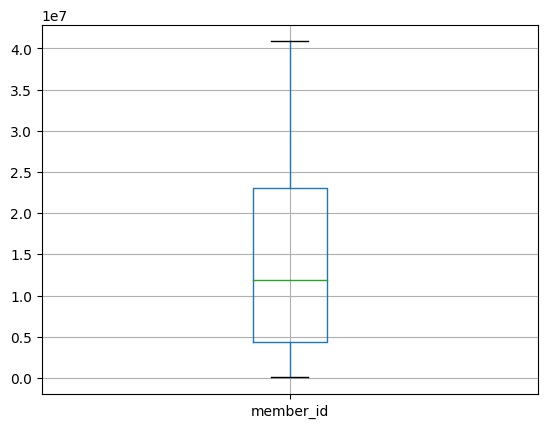

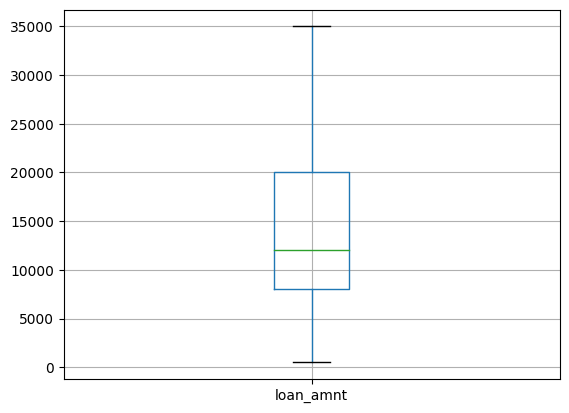

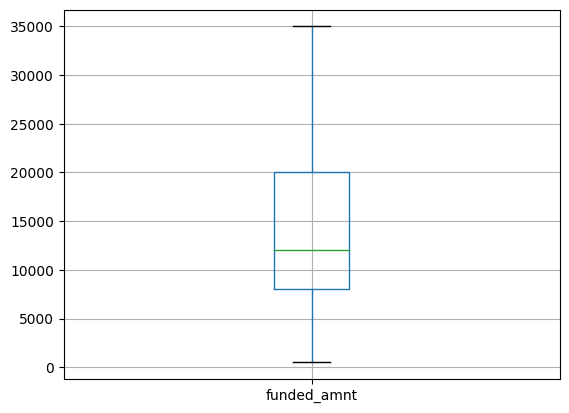

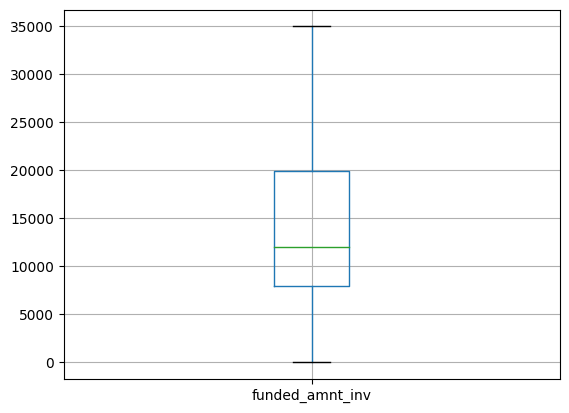

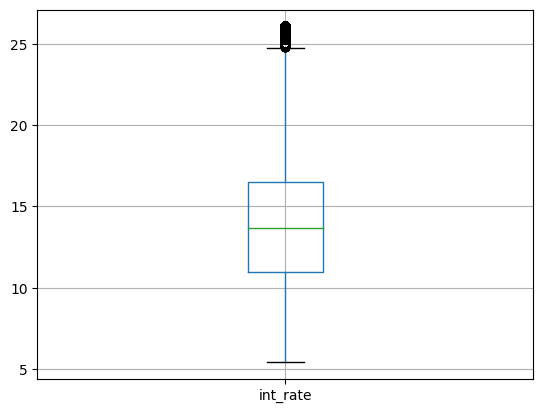

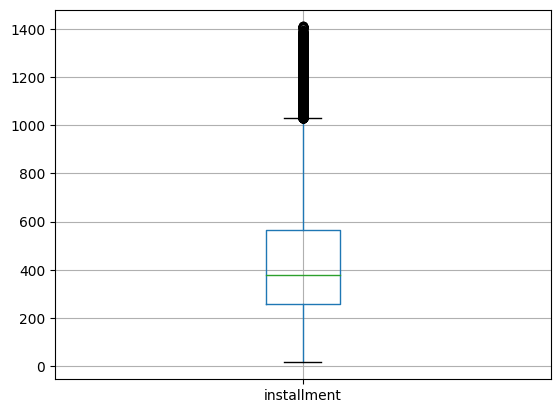

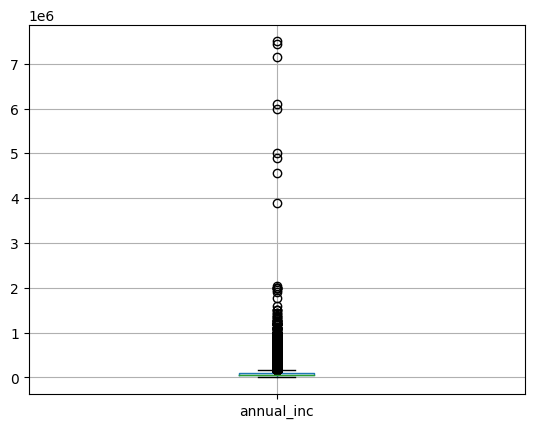

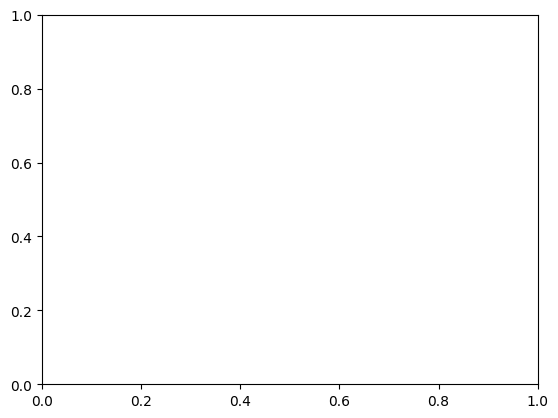

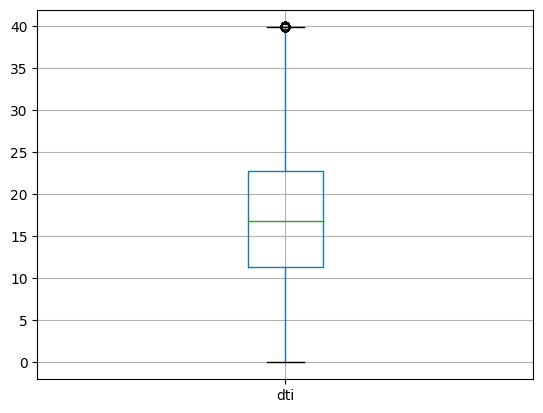

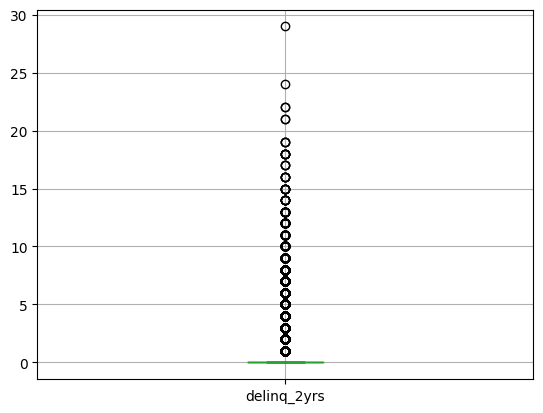

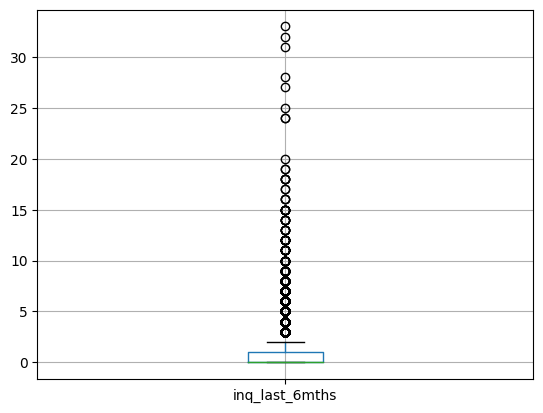

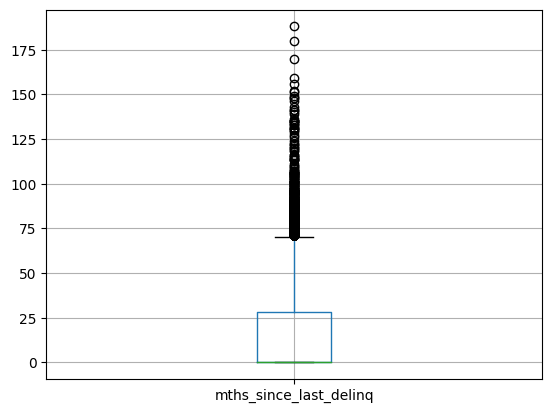

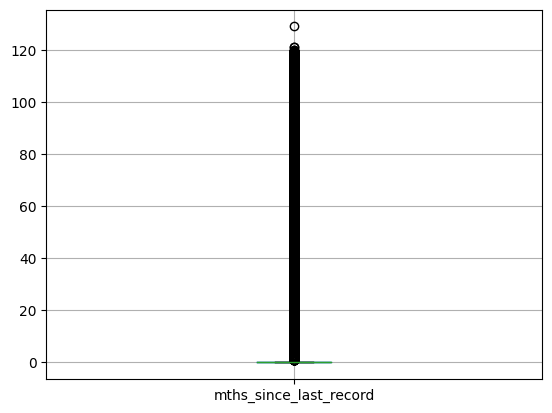

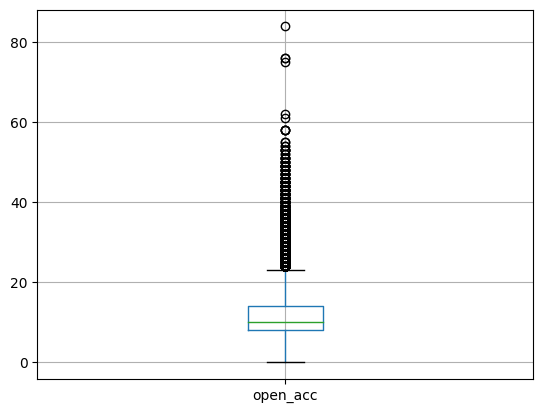

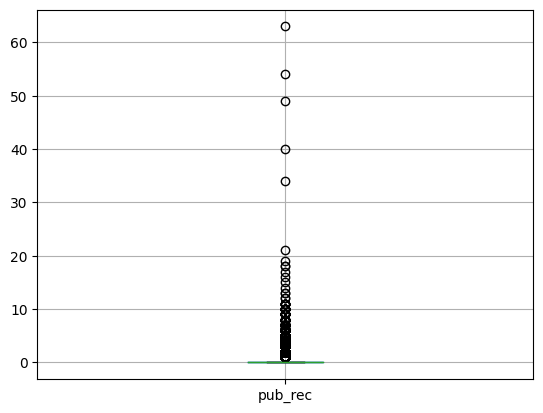

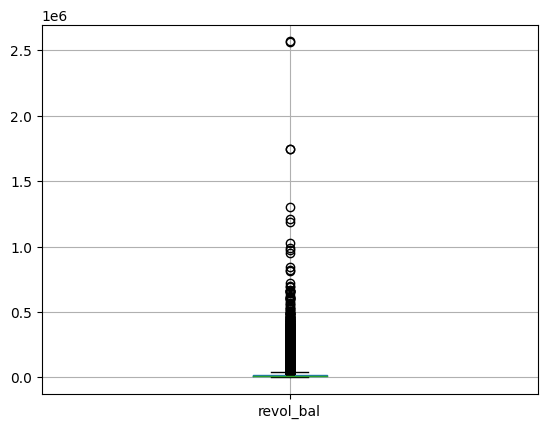

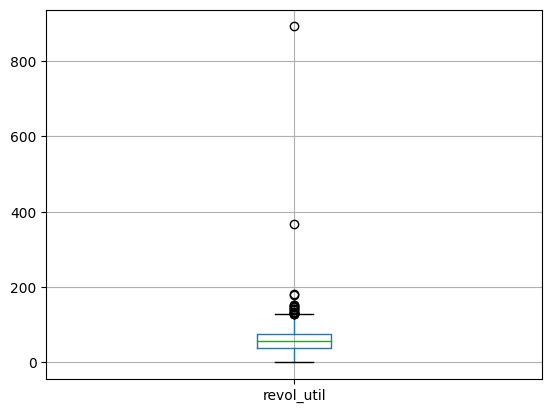

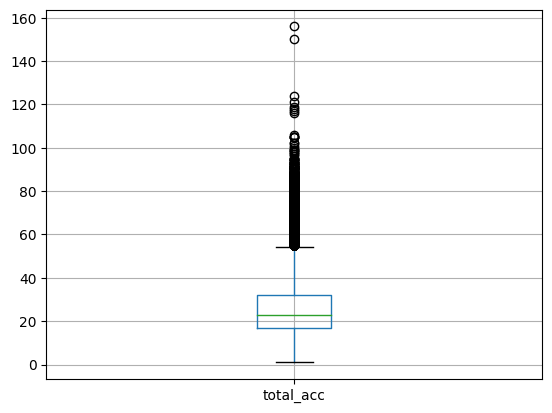

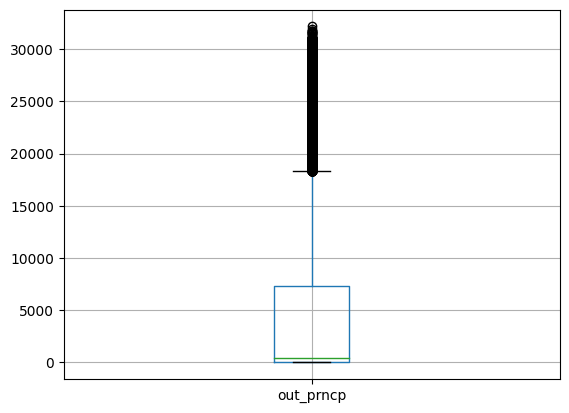

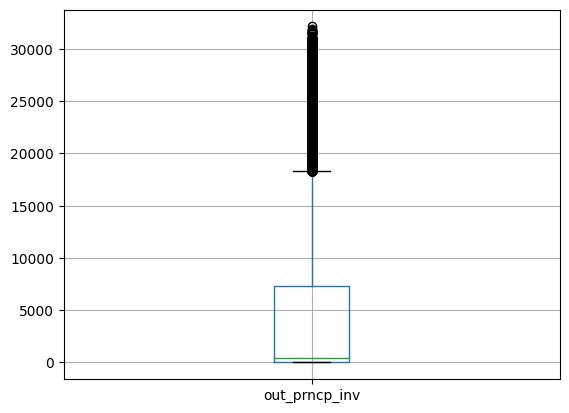

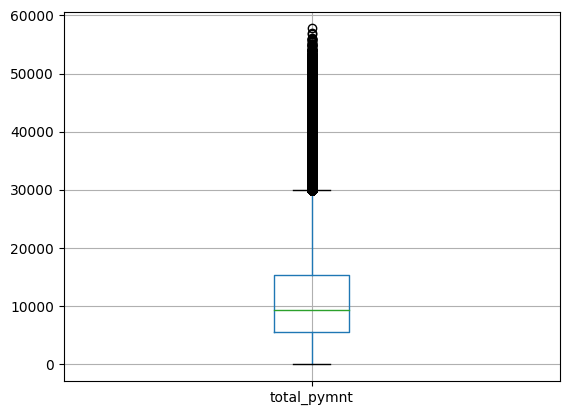

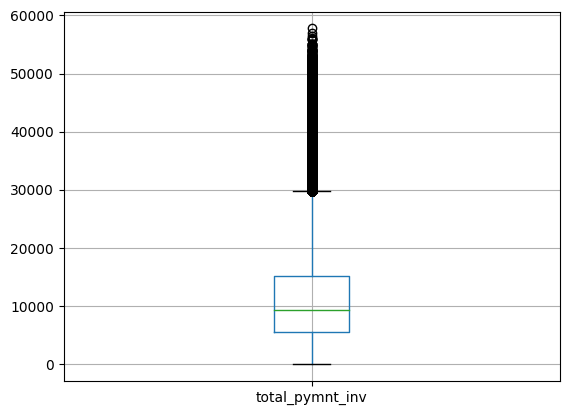

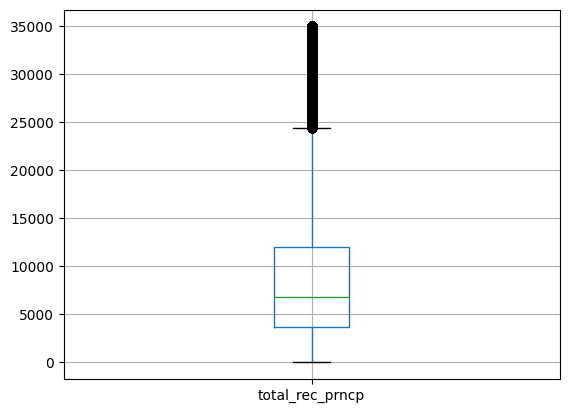

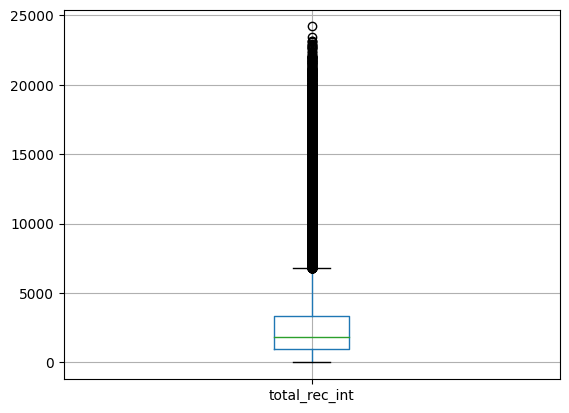

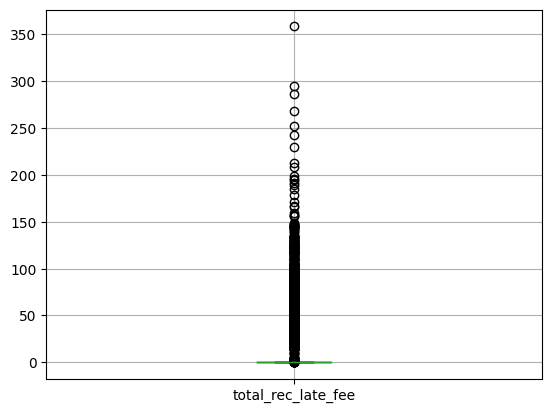

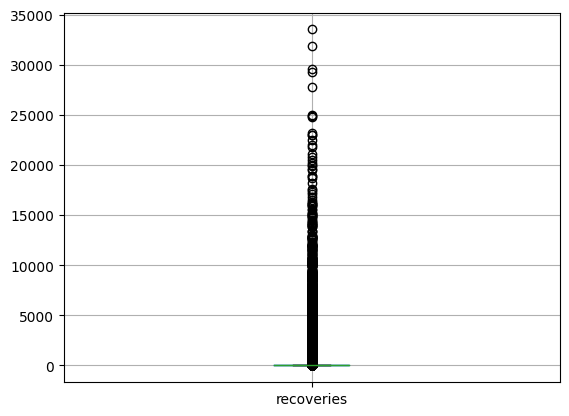

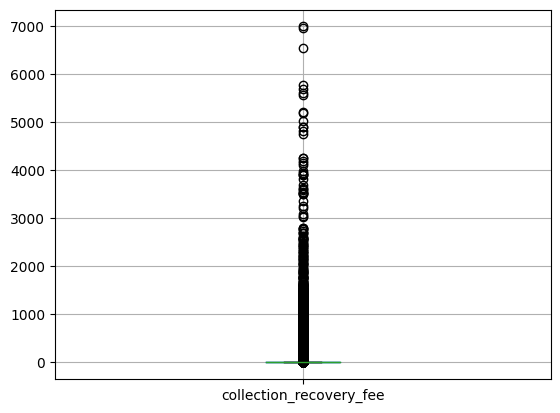

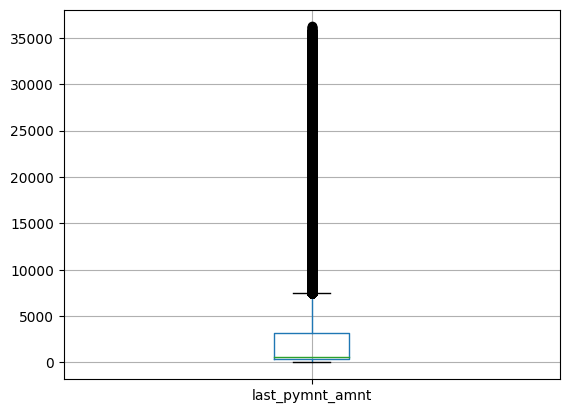

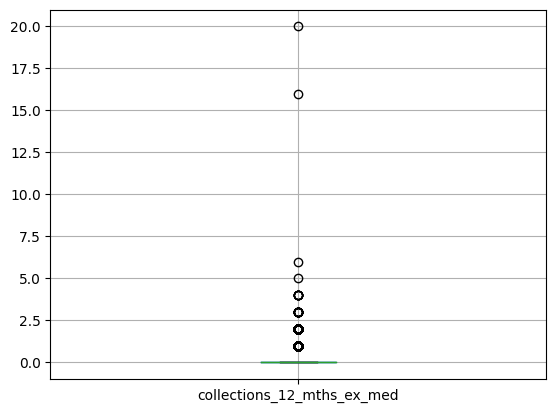

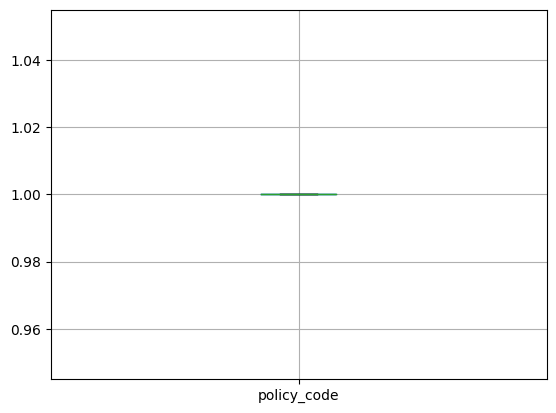

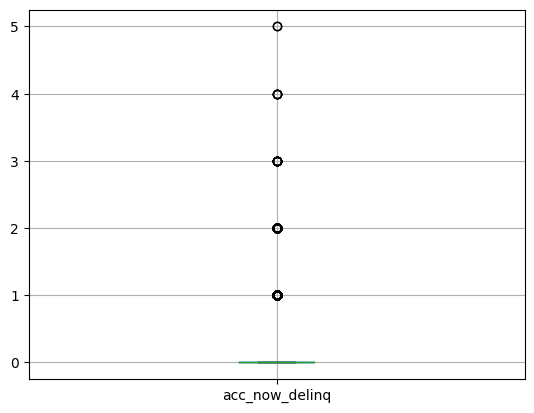

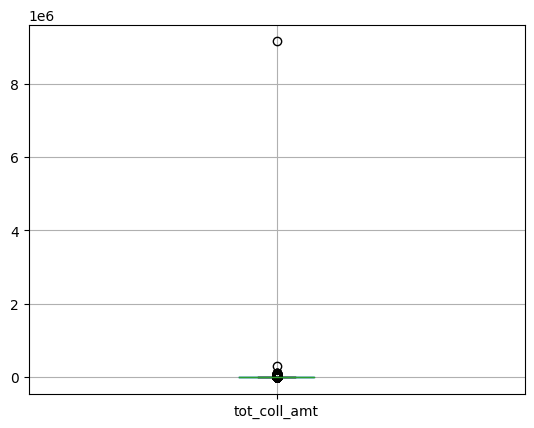

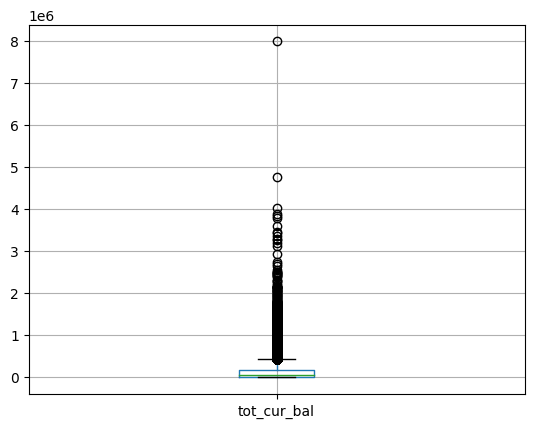

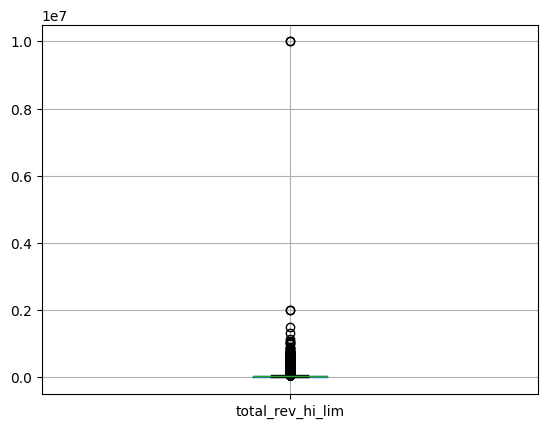

In [79]:
df_copy = df.copy()

for col in df_copy.columns:
  if df_copy[col].dtypes not in ['object', 'O']:
    Q1 = np.percentile(df_copy[col], 25, method='midpoint')
    Q3 = np.percentile(df_copy[col], 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3 +1.5*IQR
    lower = Q1 -1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df_copy[col]>=upper)[0]
    lower_array = np.where(df_copy[col]<=lower)[0]
    print(f'number of outlier in column {col} are {len(upper_array) + len(lower_array)}')

    # Removing the outliers
    try:
      plt.figure()
      df_copy.boxplot([col])

    except Exception as e:
      print(f'column {col} can\'t be plotted')
  else:
    continue


### Save cleaned dataset

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466256 entries, 0 to 466284
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          466256 non-null  int64         
 1   member_id                   466256 non-null  int64         
 2   loan_amnt                   466256 non-null  int64         
 3   funded_amnt                 466256 non-null  int64         
 4   funded_amnt_inv             466256 non-null  float64       
 5   term                        466256 non-null  object        
 6   int_rate                    466256 non-null  float64       
 7   installment                 466256 non-null  float64       
 8   grade                       466256 non-null  object        
 9   sub_grade                   466256 non-null  object        
 10  emp_title                   466256 non-null  object        
 11  emp_length                  466256 non-

In [81]:
df.to_csv(os.path.join(data_path, 'cleaned-dataset-v0.csv'))